In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

In [8]:
# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Additional Convolutional layers
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.GlobalAveragePooling2D())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
train_datagen = ImageDataGenerator(
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     rescale = 1./255
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Replace 'path/to/dataset' with the path to your dataset
train_generator = train_datagen.flow_from_directory(
    'C:/Users/sahad/Documents/Python/MobileNet/archive/images/train/',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
    'C:/Users/sahad/Documents/Python/MobileNet/archive/images/validation/',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse')


train_generator.class_indices

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath="model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

es = EarlyStopping(monitor = "val_accuracy", patience = 10)

stop = [mc, es]

In [11]:
# Train the model
history = model.fit(train_generator, epochs=40, validation_data=validation_generator, callbacks = stop)

Epoch 1/40
901/901 [==============================] - ETA: 0s - loss: 1.8165 - accuracy: 0.2490
Epoch 1: val_accuracy improved from -inf to 0.25800, saving model to model.h5
901/901 [==============================] - 83s 91ms/step - loss: 1.8165 - accuracy: 0.2490 - val_loss: 1.7939 - val_accuracy: 0.2580
Epoch 2/40
901/901 [==============================] - ETA: 0s - loss: 1.7900 - accuracy: 0.2529
Epoch 2: val_accuracy improved from 0.25800 to 0.28687, saving model to model.h5
901/901 [==============================] - 82s 91ms/step - loss: 1.7900 - accuracy: 0.2529 - val_loss: 1.7337 - val_accuracy: 0.2869
Epoch 3/40
901/901 [==============================] - ETA: 0s - loss: 1.7422 - accuracy: 0.2797
Epoch 3: val_accuracy improved from 0.28687 to 0.31857, saving model to model.h5
901/901 [==============================] - 82s 91ms/step - loss: 1.7422 - accuracy: 0.2797 - val_loss: 1.6663 - val_accuracy: 0.3186
Epoch 4/40
901/901 [==============================] - ETA: 0s - loss: 1.6

In [12]:
# Loading the best fit model
from keras.models import load_model
model = load_model("C:/Users/sahad/Documents/Python/MobileNet/Iteration/CNN/Modification_2/model.h5")


In [13]:
plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

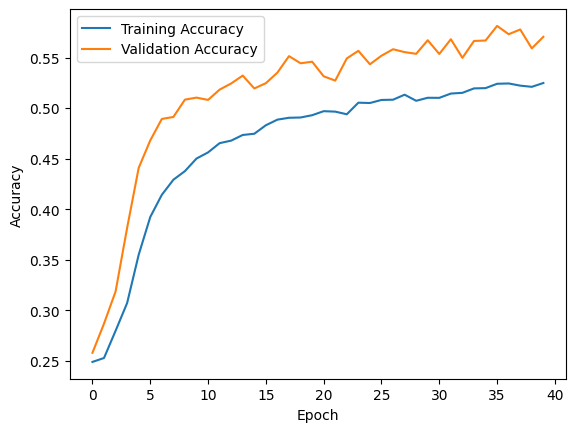

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

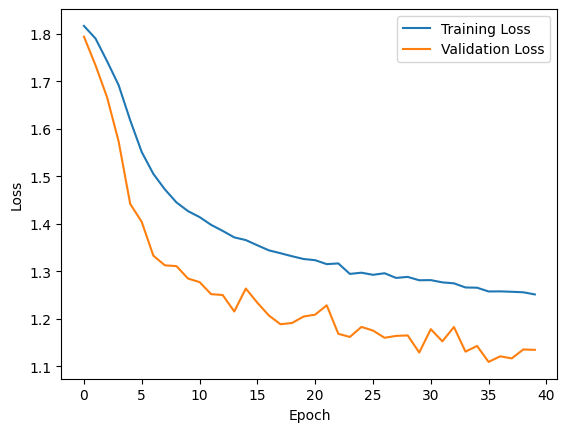

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
op = dict(zip( train_generator.class_indices.values(), train_generator.class_indices.keys()))

1/1 [==============================] - 0s 19ms/step


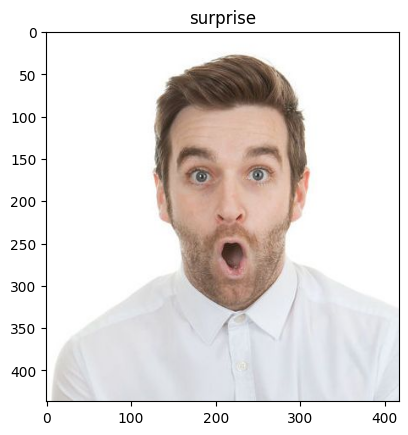

In [21]:
# Load and preprocess an image for prediction
img_path = 'C:/Users/sahad/Desktop/Test/Surprised/6dfb5660c821203ebfc479951993a0a3.jpg'  # Replace with the path to your test image
original_img = image.load_img(img_path)

img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1


# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Display the image with the predicted class label

plt.title(f'{op[predicted_class]}')
plt.imshow(original_img)